<a href="https://colab.research.google.com/github/afif-af/ml_pytorch_scikitlearn/blob/main/Chapter06ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases'
'/breast-cancer-wisconsin/wdbc.data',
header=None
)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.preprocessing import LabelEncoder
X=df.loc[:,2:].values
y=df.loc[:,1].values
le=LabelEncoder()
y=le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
le.transform(['M','B'])

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.20,
                                               stratify=y,
                                               random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr=make_pipeline(StandardScaler(),
                      PCA(n_components=2),
                      LogisticRegression())
pipe_lr.fit(X_train,y_train)
y_pred=pipe_lr.predict(X_test)
test_acc=pipe_lr.score(X_test,y_test)
print(f'Test accuracy:{test_acc:.3f}')

Test accuracy:0.956


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=10).split(X_train,y_train)
scores=[]
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train], y_train[train])
  score=pipe_lr.score(X_train[test], y_train[test])
  scores.append(score)
  print(f'Fold:{k+1:02d}, '
        f'Class distr.:{np.bincount(y_train[train])},'
        f'Acc. {score:.3f}')

Fold:01, Class distr.:[256 153],Acc. 0.935
Fold:02, Class distr.:[256 153],Acc. 0.935
Fold:03, Class distr.:[256 153],Acc. 0.957
Fold:04, Class distr.:[256 153],Acc. 0.957
Fold:05, Class distr.:[256 153],Acc. 0.935
Fold:06, Class distr.:[257 153],Acc. 0.956
Fold:07, Class distr.:[257 153],Acc. 0.978
Fold:08, Class distr.:[257 153],Acc. 0.933
Fold:09, Class distr.:[257 153],Acc. 0.956
Fold:10, Class distr.:[257 153],Acc. 0.956


In [ ]:
mean_acc=np.mean(scores)
std_acc=np.std(scores)
print(f'\nCV accuracy:{mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy:0.950 +/- 0.014


In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe_lr,
                       X=X_train,
                       y=y_train,
                       cv=10,
                       n_jobs=1)
print(f'CV accuracy scores:{scores}')

CV accuracy scores:[0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [ ]:
print(f'CV accuracy:{np.mean(scores):.3f}'
      f'+/- {np.std(scores):.3f}')

CV accuracy:0.950+/- 0.014


In [ ]:
import matplotlib.pyplot as plt

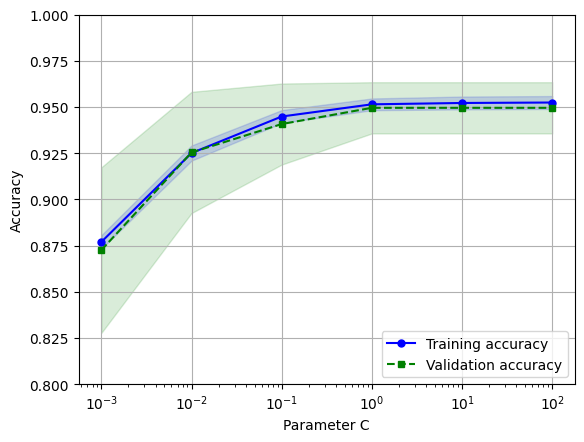

In [ ]:
from sklearn.model_selection import validation_curve
param_range=[0.001,0.01,0.1,1.0,10.0,100.0]
train_scores, test_scores=validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10
)

train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,
         color='blue',marker='o',
         markersize=5,label='Training accuracy')
plt.fill_between(param_range,
                 train_mean+train_std,
                 train_mean-train_std,alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green',linestyle='--',
         marker='s',markersize=5,
         label='Validation accuracy')
plt.fill_between(param_range,
                 test_mean+test_std,
                 test_mean-test_std,alpha=0.15,
                 color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc=make_pipeline(StandardScaler(),
                       SVC(random_state=1))
param_range=[0.0001,0.001,0.01,0.1,
             1.0,10.0,100.0,1000.0]
param_grid=[
    {'svc__C':param_range,
     'svc__kernel':['linear']
     },
    {
        'svc__C':param_range,
        'svc__gamma':param_range,
        'svc__kernel':['rbf']
    }
]

gs=GridSearchCV(estimator=pipe_svc,
                param_grid=param_grid,
                scoring='accuracy',
                cv=10,
                refit=True,
                n_jobs=-1)
gs=gs.fit(X_train, y_train)
print(gs.best_score_)

0.9846859903381642


In [ ]:
print(gs.best_params_)

{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [ ]:
clf=gs.best_estimator_

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001, random_state=1))])

In [ ]:
print(f'Test accuracay:{clf.score(X_test, y_test):.3f}')

Test accuracay:0.974


In [ ]:
param_range=scipy.stats.loguniform(0.0001, 1000.0)

In [ ]:
np.random.seed(1)
param_range.rvs(10)

array([8.30145146e-02, 1.10222804e+01, 1.00184520e-04, 1.30715777e-02,
       1.06485687e-03, 4.42965766e-04, 2.01289666e-03, 2.62376594e-02,
       5.98924832e-02, 5.91176467e-01])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
pipe_svc=make_pipeline(StandardScaler(),
                       SVC(random_state=1))

param_grid=[{'svc__C':param_range,
             'svc__kernel':['linear']},
            {'svc__C':param_range,
             'svc__gamma':param_range,
             'svc__kernel':['rbf']}]
rs=RandomizedSearchCV(estimator=pipe_svc,
                      param_distributions=param_grid,
                      scoring='accuracy',
                      refit=True,
                      n_iter=20,
                      cv=10,
                      random_state=1,
                      n_jobs=-1)
rs=rs.fit(X_train, y_train)
print(rs.best_score_)

0.9780676328502416


In [ ]:
print(rs.best_params_)

{'svc__C': np.float64(0.05971247755848463), 'svc__kernel': 'linear'}


In [ ]:
from sklearn.experimental import enable_halving_search_cv

In [ ]:
from sklearn.model_selection import HalvingRandomSearchCV
hs=HalvingRandomSearchCV(
    pipe_svc,
    param_distributions=param_grid,
    n_candidates='exhaust',
    resource='n_samples',
    factor=1.5,
    random_state=1,
    n_jobs=-1
)

In [ ]:
hs=hs.fit(X_train, y_train)

In [ ]:
print(hs.best_score_)

0.9617647058823529


In [ ]:
print(hs.best_params_)

{'svc__C': np.float64(4.934834261073333), 'svc__kernel': 'linear'}


In [ ]:
clf=hs.best_estimator_
print(f'Test acc:{hs.score(X_test,y_test):.3f}')

Test acc:0.982


In [ ]:
param_range = [0.0001, 0.001, 0.01, 0.1,1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

In [ ]:
scores=cross_val_score(gs,X_train,y_train,
                       scoring='accuracy',cv=5)

In [ ]:
print(f'CV accuracy:{np.mean(scores):.3f}'
     f'+/- {np.std(scores):.3f}')

CV accuracy:0.974+/- 0.015


In [ ]:
from sklearn.tree import DecisionTreeClassifier
gs=GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],
    scoring='accuracy',
    cv=2
)

In [ ]:
scores=cross_val_score(gs, X_train ,y_train,
                       scoring='accuracy',cv=5)

In [ ]:
print(f'Cv accuracu:{np.mean(scores):.3f}'
f'+/- {np.std(scores):.3f}')

In [42]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred=pipe_svc.predict(X_test)
confmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
print(confmat)


[[71  1]
 [ 2 40]]


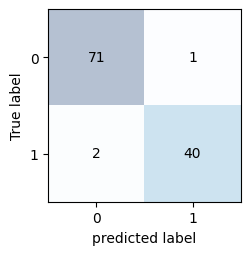

In [45]:
fig,ax=plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j,y=i,s=confmat[i,j],
            va='center',ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.show()